In [6]:
import pandas as pd
import numpy as np 
import math
#from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score 
from sklearn.impute import KNNImputer

#### Splitting the dataset into train and test set

In [7]:
music_dataframe = pd.read_csv("/workspaces/Music_Dataset/data/music_dataset_cleaned.csv")

In [8]:
music_dataframe.Class = music_dataframe.Class.astype(str)

In [9]:
music_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17996 non-null  int64  
 1   Artist Name         17996 non-null  object 
 2   Track Name          17996 non-null  object 
 3   Popularity          17996 non-null  float64
 4   danceability        17996 non-null  float64
 5   energy              17996 non-null  float64
 6   key                 17996 non-null  float64
 7   loudness            17996 non-null  float64
 8   mode                17996 non-null  int64  
 9   speechiness         17996 non-null  float64
 10  acousticness        17996 non-null  float64
 11  instrumentalness    17996 non-null  float64
 12  liveness            17996 non-null  float64
 13  valence             17996 non-null  float64
 14  tempo               17996 non-null  float64
 15  duration_in min/ms  17996 non-null  float64
 16  time

In [10]:
class_col = music_dataframe.Class
train, test = train_test_split(music_dataframe, train_size=0.7, random_state=123, stratify=class_col)
train.shape

(12597, 18)

In [11]:
#train.to_csv("data/music_dataset_train.csv")

In [12]:
#test.to_csv("data/music_dataset_test.csv")

In [13]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import *
from matplotlib import pyplot as plt

# Modeling packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence

In [14]:
X_train = train.drop("Class", axis=1)
y_train = train[["Class"]]

In [15]:
X_train.head(1)

,Unnamed: 0,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
5086,5086,Kings Elliot,I'm Getting Tired of Me,50.0,0.599,0.357,2.0,-9.55,1,0.0299,0.753,0.177562,0.0902,0.421,83.26,216224.0,4


In [16]:
y_train.head()

,Class
5086,9
369,6
5900,0
1036,10
11452,7


In [17]:
X_test = test.drop("Class", axis=1)
y_test = test[["Class"]]

In [18]:
#y_test.info()

In [19]:
dt_mod = DecisionTreeClassifier(max_depth=5)

# Step 2: fit/train model
dt_fit = dt_mod.fit(X_train[["tempo", "mode", "instrumentalness"]], y_train)

In [20]:
y_pred = dt_fit.predict(X_test[[ "tempo", "mode", "instrumentalness"]])

In [21]:
y_test.head()

,Class
7020,10
8390,1
4439,7
2383,2
4627,4


In [22]:
y_pred

array(['10', '10', '7', ..., '10', '6', '10'], dtype=object)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0  131    0    0    0    2   14    2    3   35]
 [   0    1  267    0    0    0    8   80   22    3   31]
 [   0    2 1031    0    0    0   73  151   12   29  187]
 [   0    4  277    0    0    0    8   48    5    7   33]
 [   0    0   83    0    0    0    5   10    3    1   19]
 [   0    0   61    0    0    0   13    3    0    1   38]
 [   0    0  208    0    0    0   84    6    1    2  133]
 [   0    1  477    0    0    0   18  174   47   13   46]
 [   0    0   32    0    1    0    0   51   89    0    0]
 [   0    0  381    0    0    0    6  102   26    9   32]
 [   0    0  405    0    0    0   51   33    4    0  264]]


In [24]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30598258936840156


- Trying with more features: energy , loudness and Popularity 

In [25]:
dt_mod = DecisionTreeClassifier(max_depth=5)

# Step 2: fit/train model
dt_fit = dt_mod.fit(X_train[["energy", "loudness", "valence", "instrumentalness"]], y_train)
y_pred = dt_fit.predict(X_test[["energy", "loudness", 'valence', "instrumentalness"]])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3552509724022967


- Trying with more features: energy , loudness, Popularity and duration in min

In [26]:
dt_mod = DecisionTreeClassifier(max_depth=5)

# Step 2: fit/train model
dt_fit = dt_mod.fit(X_train[["acousticness"]], y_train)
y_pred = dt_fit.predict(X_test[["acousticness"]])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.314317466197444


In [27]:
dt_fit.get_n_leaves()

32

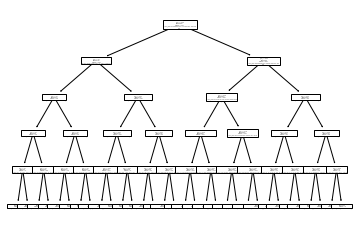

In [28]:
plot_tree(dt_fit)
plt.show()

In [29]:
# create DT model object
dt_mod = DecisionTreeClassifier()

# define loss function
loss = 'categorical_crossentropy'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train[["loudness", "energy","tempo", "acousticness"]], 
                          y_train, cv=kfold, scoring=loss)


np.round(np.abs(results))

ValueError: 'categorical_crossentropy' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)

# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train_encoded, y_train, cv=kfold, scoring=loss)

np.abs(np.mean(results))

3.8282003565412333

Tuning 

In [ ]:
# create model object
dt_mod = DecisionTreeClassifier()

# define loss function
#loss = 'neg_root_mean_squared_error'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {
  'ccp_alpha': [1e-1, 1e-5, 1e-10],
  'max_depth': [1, 8, 15],
  'min_samples_split': [2, 21, 40]
  }

In [ ]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train_encoded, y_train)

# Optimal penalty parameter in grid search
results.best_estimator_

ValueError: 'entropy' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
# Best model's cross validated RMSE
round(abs(results.best_score_), 2)

2.94

## Feature interpretation


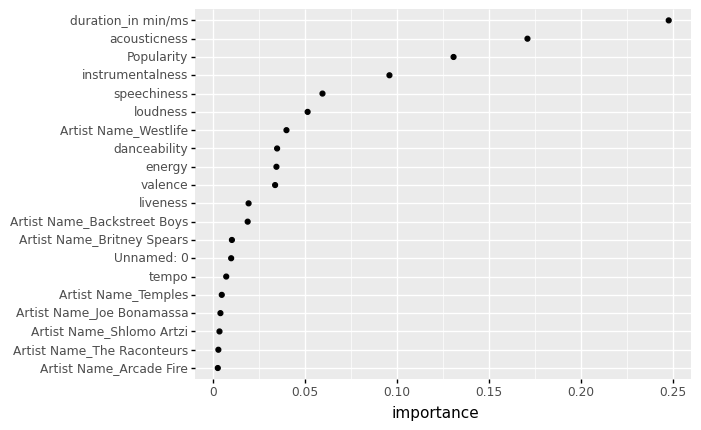

<ggplot: (8767203941885)>

In [ ]:
# create final model object
best_mod = results.best_estimator_
best_mod_fit = best_mod.fit(X_train_encoded, y_train)

# extract feature importances
vi = pd.DataFrame({'feature': X_train_encoded.columns,
                   'importance': best_mod_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))